In [1]:
from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
np.array(train_data[0])   # example of movie review

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

-------------------

example of one decoded review (will not be used for training)

In [4]:
word_index = imdb.get_word_index()   # a dictionary mapping words to an integer index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [5]:

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
#Decodes the review from numbers to corresponding words
# the indices 0,1,2 are reserved for “padding,” “start of sequence,” and “unknown”

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

-------------------

In [7]:
# encoding sequences of integers numbers into a binary matrix
def vectorize_sequences(sequences, dimension=10000): # Создание матрицы с фор-мой (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.   # Запись единицы в элемент с данным индексом
    return results

#for each review an array of 10.000 length is created, and if there is a word under number 5, then 1 is placed in the 5th place, other places are 0
# and there are as many arrays as the number of reviews

In [8]:
# encoding x

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
# encoding y

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

-------------------------

creating model

In [10]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320,577
Trainable params: 320,577
Non-trainable params: 0
_________________________________________________________________


In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [15]:
history = model.fit(partial_x_train, partial_y_train,epochs=10,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 4s 105ms/step - loss: 0.5251 - acc: 0.7614 - val_loss: 0.3853 - val_acc: 0.8669
Epoch 2/10
30/30 [==============================] - 1s 43ms/step - loss: 0.3195 - acc: 0.8881 - val_loss: 0.3193 - val_acc: 0.8713
Epoch 3/10
30/30 [==============================] - 1s 41ms/step - loss: 0.2337 - acc: 0.9187 - val_loss: 0.2962 - val_acc: 0.8806
Epoch 4/10
30/30 [==============================] - 1s 26ms/step - loss: 0.1910 - acc: 0.9335 - val_loss: 0.2836 - val_acc: 0.8863
Epoch 5/10
30/30 [==============================] - 1s 25ms/step - loss: 0.1629 - acc: 0.9432 - val_loss: 0.2837 - val_acc: 0.8859
Epoch 6/10
30/30 [==============================] - 1s 25ms/step - loss: 0.1409 - acc: 0.9515 - val_loss: 0.3127 - val_acc: 0.8819
Epoch 7/10
30/30 [==============================] - 1s 28ms/step - loss: 0.1197 - acc: 0.9607 - val_loss: 0.3118 - val_acc: 0.8787
Epoch 8/10
30/30 [==============================] - 1s 28ms/step - loss: 0.1016 - 

In [16]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3802 - acc: 0.8700


[0.3801785409450531, 0.8700000047683716]

------------------

building graphs of losses at the stages of training and verification

In [17]:
history_dict = history.history

In [18]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [19]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

In [20]:
epochs = range(1, len(acc) + 1)

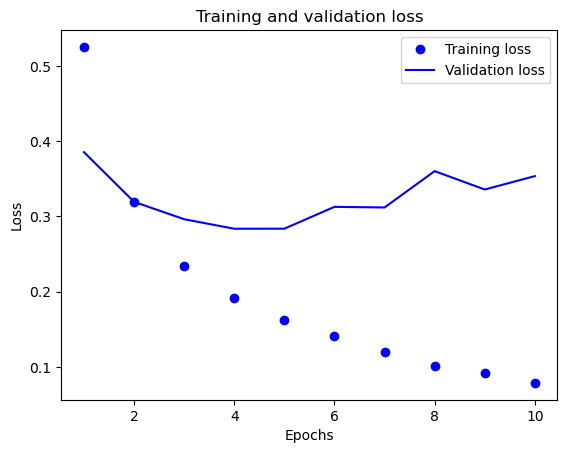

In [21]:
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

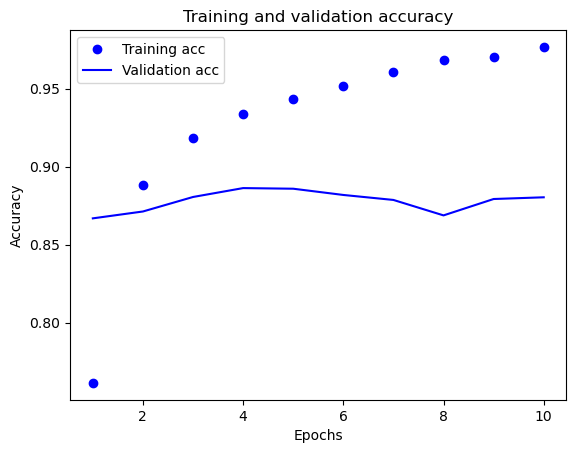

In [22]:
plt.clf() #Очистить рисунок
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

---------------------

predicting

In [23]:
predicted_test = model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


In [24]:
predicted_test

array([[0.11434013],
       [0.99996525],
       [0.9196085 ],
       ...,
       [0.02901582],
       [0.04289597],
       [0.7984695 ]], dtype=float32)

In [25]:
import pandas as pd

In [26]:
a = pd.DataFrame(y_test,columns=['test_real'])

In [27]:
a['test_predicted'] = pd.DataFrame(predicted_test)
a['test_predicted_binary'] = pd.Series(map(lambda q: 0 if q<0.5 else 1,a['test_predicted']))

In [29]:
a

,test_real,test_predicted,test_predicted_binary
0,0.0,0.114340,0
1,1.0,0.999965,1
2,1.0,0.919608,1
3,0.0,0.873496,1
4,1.0,0.959198,1
...,...,...,...
24995,1.0,0.999997,1
24996,1.0,0.650550,1
24997,0.0,0.029016,0
24998,0.0,0.042896,0


In [30]:
np.unique(np.array(a['test_real']==a['test_predicted_binary']), return_counts=True) # 3250 misprediction and 21750 correct predictions

(array([False,  True]), array([ 3250, 21750], dtype=int64))